In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [27]:
train_df=pd.read_csv('/Users/amitsubedi/Desktop/AVIT- EShop/Cardio-Vascular-analysis/mitbih_train.csv',header=None)
test_df=pd.read_csv('/Users/amitsubedi/Desktop/AVIT- EShop/Cardio-Vascular-analysis/mitbih_test.csv',header=None)

In [28]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


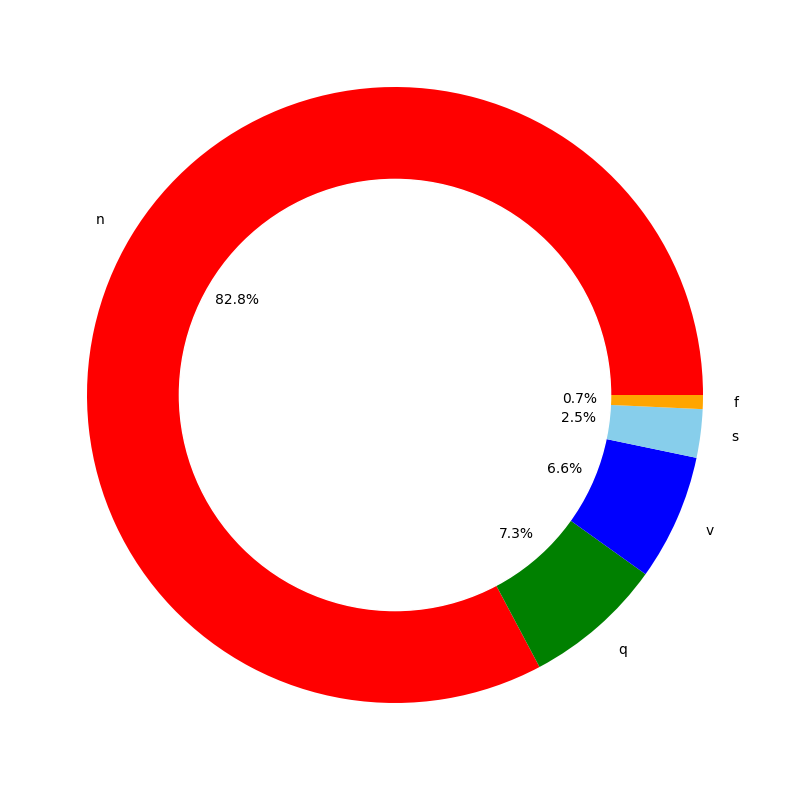

In [29]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [30]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [31]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


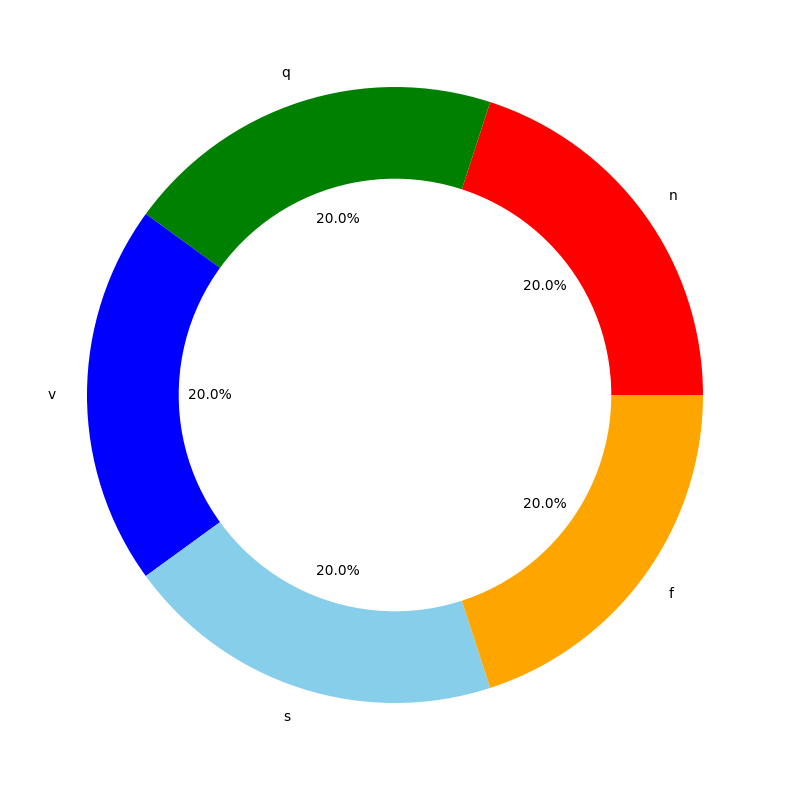

In [32]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [33]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
71488,1.000000,0.938830,0.529255,0.069149,0.138298,0.284574,0.340426,0.372340,0.369681,0.385638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74145,1.000000,0.786957,0.195652,0.047826,0.130435,0.182609,0.134783,0.160870,0.243478,0.213043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79622,0.303371,0.387640,0.551685,0.714607,0.862921,0.939326,0.986517,1.000000,0.967416,0.928090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80608,1.000000,0.850502,0.479899,0.136935,0.118090,0.139447,0.105528,0.085427,0.086683,0.081658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86548,0.966771,0.914849,0.850467,0.779855,0.670820,0.548287,0.395639,0.277259,0.186916,0.158879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


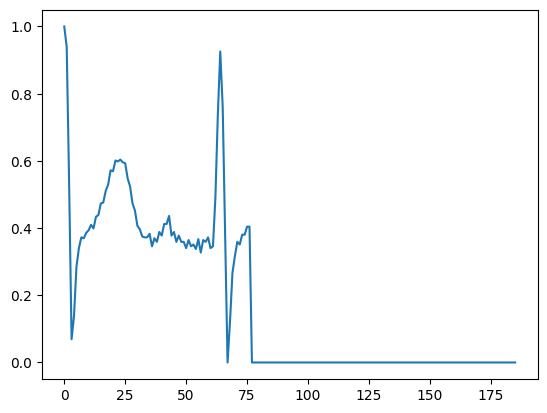

In [34]:
 plt.plot(c.iloc[0,:186])

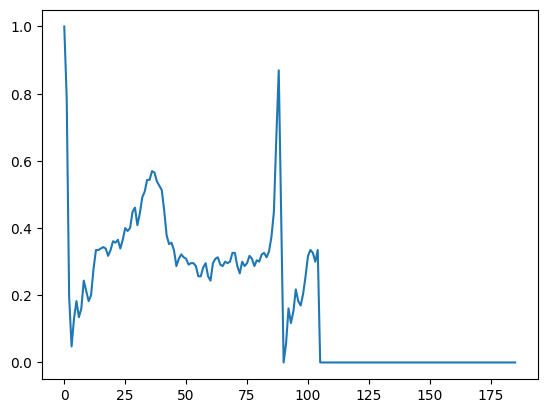

In [35]:
plt.plot(c.iloc[1,:186])

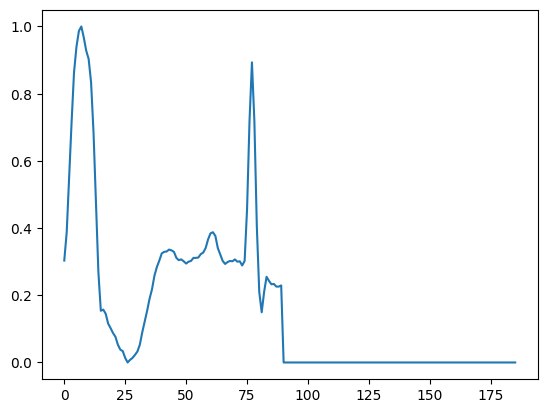

In [36]:
plt.plot(c.iloc[2,:186])

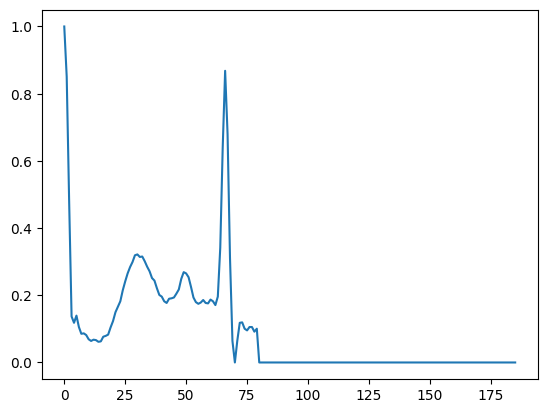

In [37]:
plt.plot(c.iloc[3,:186])

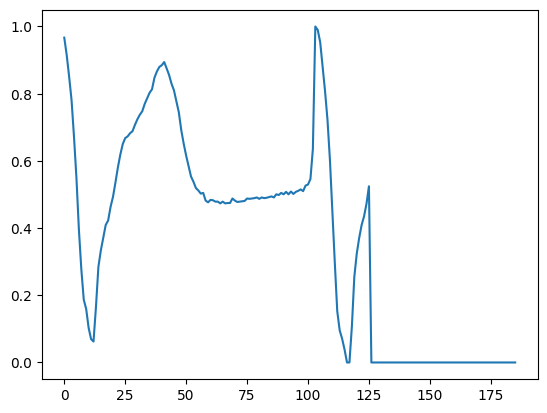

In [38]:
plt.plot(c.iloc[4,:186])

In [39]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

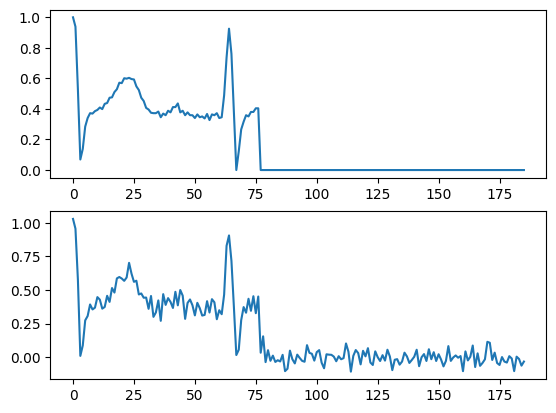

In [40]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [41]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [42]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [43]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [44]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [45]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [48]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 27s 8ms/step - loss: 0.1926 - accuracy: 0.9322 - val_loss: 0.1236 - val_accuracy: 0.9605
Epoch 2/40
3125/3125 [==============================] - 28s 9ms/step - loss: 0.0740 - accuracy: 0.9747 - val_loss: 0.1980 - val_accuracy: 0.9347
Epoch 3/40
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0493 - accuracy: 0.9834 - val_loss: 0.1431 - val_accuracy: 0.9561
Epoch 4/40
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.1627 - val_accuracy: 0.9508
Epoch 5/40
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.1245 - val_accuracy: 0.9733
Epoch 6/40
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.1336 - val_accuracy: 0.9689
Epoch 7/40
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.1310 - val_ac

NameError: name 'best_model' is not defined

In [49]:
def evaluate_model(history, X_test, y_test, model):
    metrics = ['mae', 'mse', 'msle', 'accuracy', 'precision', 'recall']
    results = {}
    
    # get the state of the model at the end of the training
    best_model = model.model
    
    # Get the predicted classes
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    scores = best_model.evaluate(X_test, y_test, verbose=0)
    results['scores'] = scores
    
    # Prediction accuracy
    results['accuracy'] = accuracy_score(y_test, y_pred)
    
    # Precision
    results['precision'] = precision_score(y_test, y_pred, average='binary')
    
    # Recall
    results['recall'] = recall_score(y_test, y_pred, average='binary')
    
    # MAE - Mean Absolute Error
    results['mae'] = mean_absolute_error(y_test, y_pred)
    
    # MSE - Mean Squared Error
    results['mse'] = mean_squared_error(y_test, y_pred)
    
    # MSLE - Mean Squared Logarithmic Error
    results['msle'] = mean_squared_logarithmic_error(y_test, y_pred)
    
    return results

In [51]:
# evaluate_model(history,X_test,y_test,model)
y_pred=best_model.predict(X_test)

NameError: name 'best_model' is not defined

In [52]:
X_train.shape

(100000, 186, 1)

In [53]:
Data1 = train_df.iloc[:,0:187]
Data1.drop_duplicates(keep=False, inplace=True)

In [57]:
index = int(input("Enter Index:"))
index_inp = Data1.loc[[index]]
index_inp

ValueError: invalid literal for int() with base 10: '0.1'

In [58]:
from tensorflow.keras.models import load_model
best_model = load_model("C:\\Users\\divya\\best_model.h5")
# x=train_df.iloc[2,:186].values
# # x=x.reshape(1,186,1)
y_pred1=best_model.predict(index_inp)
np.round(y_pred1)

OSError: No file or directory found at C:\Users\divya\best_model.h5

In [59]:
import numpy as np
for x in y_pred1:
    np.round(x) 
    if x[0]==1.0:
      print("N-0th level")
    elif x[1]==1.0:
      print("S-1st level")
    elif x[2]==1.0:
      print("V-2nd level")
    elif x[3]==1.0:
      print("F-3rd level")
    else:
      print("Q-Final level")

NameError: name 'y_pred1' is not defined

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
evaluate_model(history,X_test,y_test,model)

In [ ]:
classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))